Looking experiment and scientific report

paper found https://journals.asm.org/doi/10.1128/MRA.00829-19

Accessing to data in SRA: https://trace.ncbi.nlm.nih.gov/Traces/sra/?run=SRR10294312

File Fastq was downloaded in local folder and then uploaded to user folder in Apolo: /home/jcorre38/klebsiela


In [ ]:
%%bash
scp klebsiellaSRX7007143.fastq jcorre38@apolo.eafit.edu.co:/home/jcorre38/klebsiela

Creating Conda environment 

In [ ]:
%%bash
#Loading python
module load python/3.9_miniconda-4.9.2
#Creating environment
conda create --name kneumo_ensamble
conda init bash
#Listing and Loading environment
conda env list
conda activate kneumo_ensamble


In [ ]:
%%bash
#Instaling software and packagets needed
#Fastqc
conda install -c bioconda fastqc
#Trimmomatic
conda install -c bioconda trimmomatic
#ABySS
conda install -c bioconda abyss
#SPAdes
conda install -c bioconda spades

In [ ]:
%%bash
#Cheking quality reads
fastqc ../data/klebsiellaSRX7007143.fastq
#Downloding report
scp ssierrap1@apolo.eafit.edu.co:/home/ssierrap1/kneumo_ensamble/fastqc_trim/klebsiellaSRX7007143_fastqc.html .

Quality report of reads
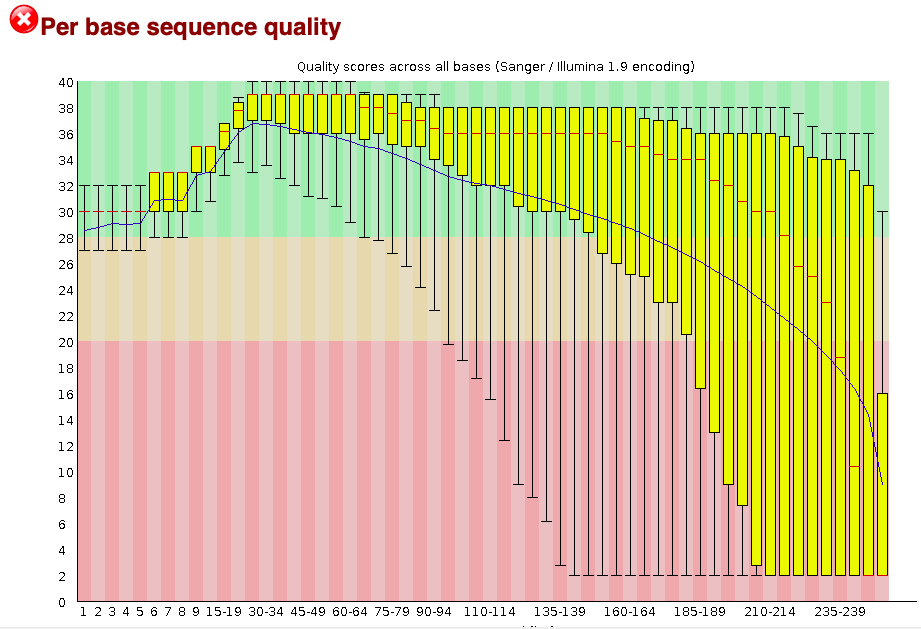

In [ ]:
#Trimming reads
java -jar $TRIMMOJAR SE -threads 4 -phred33 ../data/klebsiellaSRX7007143.fastq trimmed.fastq SLIDINGWINDOW:4:20 MINLEN:25 ILLUMINACLIP:NexteraPE-PE.fa:2:40:15
#Checking final quality
fastqc klebsiellaSRX7007143_trimmed.fastq

Quality after trimming
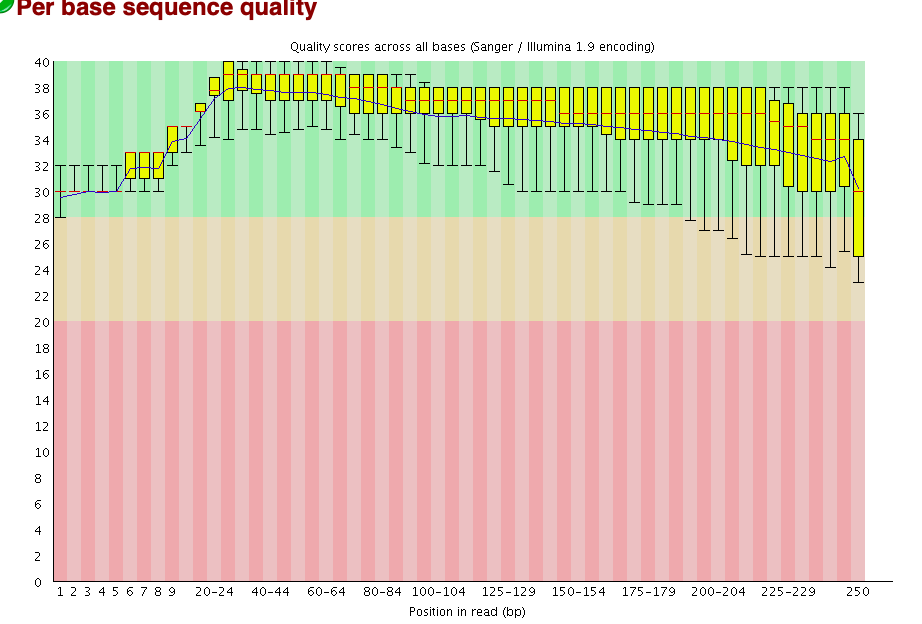

Anssembly

In [ ]:
%%bash
#ABySS anssembly
abyss-pe k=63 se=data/klebsiellaSRX7007143_trimmed.fastq name=kneumok63 "unitigs"
#AByss stats
abyss-fac kneumok63-unitigs.fa

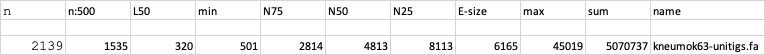

In [ ]:
#ABySS ensambly k=96
abyss-pe k=96 se=../../data/klebsiellaSRX7007143_trimmed.fastq name=kneumok96 "unitigs"
#AByss stats
abyss-fac kneumok96-unitigs.fa

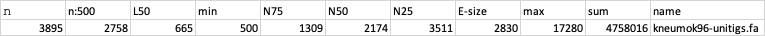

In [ ]:
#ABySS ensambly k=96
abyss-pe k=128 se=../../data/klebsiellaSRX7007143_trimmed.fastq name=kneumok128 "unitigs"
#AByss stats
abyss-fac kneumok128-unitigs.fa

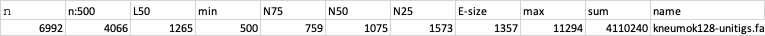

Conclusion:

Si lo comparamos con la referencia de 5,645,963 pb publicada en https://www.ncbi.nlm.nih.gov/assembly/GCA_004141975.1 el ensamble genera muchos contigs, incluso variando los kmers.

Para mejorar este ensamble se debe realizar un ensamble hiibrido junto con los datos de PacBio disponibles en el proyecto ya que los datos illumina de este proyecto son tan solo el 10% de los datos disponibles.



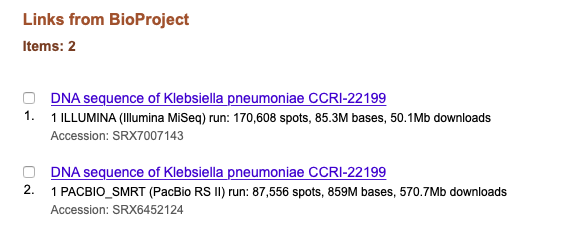

In [ ]:
%%bash
conda install -c bioconda mummer 

Vamos a comparar estos dos genomas, uno del genoma del articulo https://www.ncbi.nlm.nih.gov/nuccore/CP035540
El otro la referencia: https://www.ncbi.nlm.nih.gov/genome/815

In [ ]:
%bash
nucmer GCF_000240185.1_ASM24018v2_genomic.fna kneumo_CCRI-22199.fasta

delta-filter -1 -q out.delta > CCRI-22199.filtred.delta

dnadiff -p dnadiff -d CCRI-22199.filtred.delta

show-diff CCRI-22199.filtred.delta


CRI-22199.fasta
NUCMER

[SEQ]	[TYPE]	[S1]	[E1]	[LEN 1]
NC_016839.1	BRK	1	27933	27933
NC_016839.1	INV	28756	43329	14574
NC_016839.1	BRK	44151	105974	61824
NC_016845.1	GAP	564199	563327	-871	586	-1457
NC_016845.1	GAP	586022	587078	1057	-9	1066
NC_016845.1	GAP	904024	905080	1057	-9	1066
NC_016845.1	GAP	941068	942512	1445	-3	1448
NC_016845.1	GAP	1290963	1291473	511	640	-129
NC_016845.1	GAP	1291634	1292762	1129	1533	-404
NC_016845.1	GAP	1293118	1293428	311	519	-208
NC_016845.1	GAP	1293626	1295569	1944	1204	740
NC_016845.1	GAP	1299180	1299406	227	95	132
NC_016845.1	GAP	1299853	1300594	742	567	175
NC_016845.1	GAP	1300781	1301204	424	118	306
NC_016845.1	GAP	1302869	1338469	35601	34956	645
NC_016845.1	GAP	1364950	1364809	-140	1448	-1588
NC_016845.1	GAP	1395766	1396510	745	-14	759
NC_016845.1	GAP	1518186	1519630	1445	-4	1449
NC_016845.1	GAP	1781404	1779475	-1928	7183	-9111
NC_016845.1	GAP	1858108	1848044	-10063	-9991	-72
NC_016845.1	GAP	1995907	1995770	-136	229	-365
NC_016845.1	GAP	1999174	1998908	-265	-446	181
NC_016845.1	GAP	2052465	2054119	1655	-6	1661
NC_016845.1	GAP	2118352	2116441	-1910	1910	-3820
NC_016845.1	GAP	2244751	2244734	-16	13657	-13673
NC_016845.1	GAP	2293841	2296294	2454	-8	2462
NC_016845.1	GAP	2300198	2300192	-5	2278	-2283
NC_016845.1	GAP	2340749	2340234	-514	84	-598
NC_016845.1	GAP	2483596	2483122	-473	-35	-438
NC_016845.1	GAP	2560308	2561963	1656	-5	1661
NC_016845.1	GAP	2667757	2667697	-59	2224	-2283
NC_016845.1	GAP	3115626	3117281	1656	-5	1661
NC_016845.1	GAP	3248015	3249071	1057	-9	1066
NC_016845.1	GAP	3251525	3251661	137	137	0
NC_016845.1	GAP	3253244	3253629	386	-118	504
NC_016845.1	GAP	3254462	3254378	-83	2724	-2807
NC_016845.1	GAP	3254955	3255026	72	-18	90
NC_016845.1	GAP	3289511	3290754	1244	190	1054
NC_016845.1	GAP	3294853	3295301	449	3711	-3262
NC_016845.1	GAP	3353260	3353231	-28	4872	-4900
NC_016845.1	GAP	3428240	3429071	832	-3	835
NC_016845.1	GAP	3429817	3429805	-11	346	-357
NC_016845.1	GAP	3433561	3495688	62128	-21	62149
NC_016845.1	GAP	3556335	3560104	3770	3113	657
NC_016845.1	GAP	3561532	3574995	13464	15394	-1930
NC_016845.1	GAP	3578506	3579701	1196	-4	1200
NC_016845.1	GAP	3609862	3616778	6917	193	6724
NC_016845.1	GAP	3657208	3657222	15	639	-624
NC_016845.1	GAP	3688732	3690466	1735	197	1538
NC_016845.1	GAP	3716490	3716468	-21	12102	-12123
NC_016845.1	GAP	4029321	4029303	-17	151	-168
NC_016845.1	GAP	4049889	4085217	35329	-14	35343
NC_016845.1	GAP	4090355	4092009	1655	-6	1661
NC_016845.1	GAP	4098641	4098790	150	32012	-31862
NC_016845.1	GAP	4129565	4129485	-79	148	-227
NC_016845.1	GAP	4138510	4138508	-1	151	-152
NC_016845.1	GAP	4298210	4299266	1057	2486	-1429
NC_016845.1	GAP	4513491	4514546	1056	-10	1066
NC_016845.1	GAP	4691910	4691778	-131	102	-233
NC_016845.1	GAP	5078985	5078879	-105	62	-167
NC_016845.1	GAP	5151722	5152778	1057	-9	1066
NC_016845.1	GAP	5169584	5170351	768	-9	777
NC_016845.1	GAP	5272399	5252403	-19995	-20001	6
NC_016845.1	JMP	5299628	5299627	0

In [ ]:
%%bash
mummerplot -t png CCRI-22199.filtred.delta

[texto del vínculo](https://)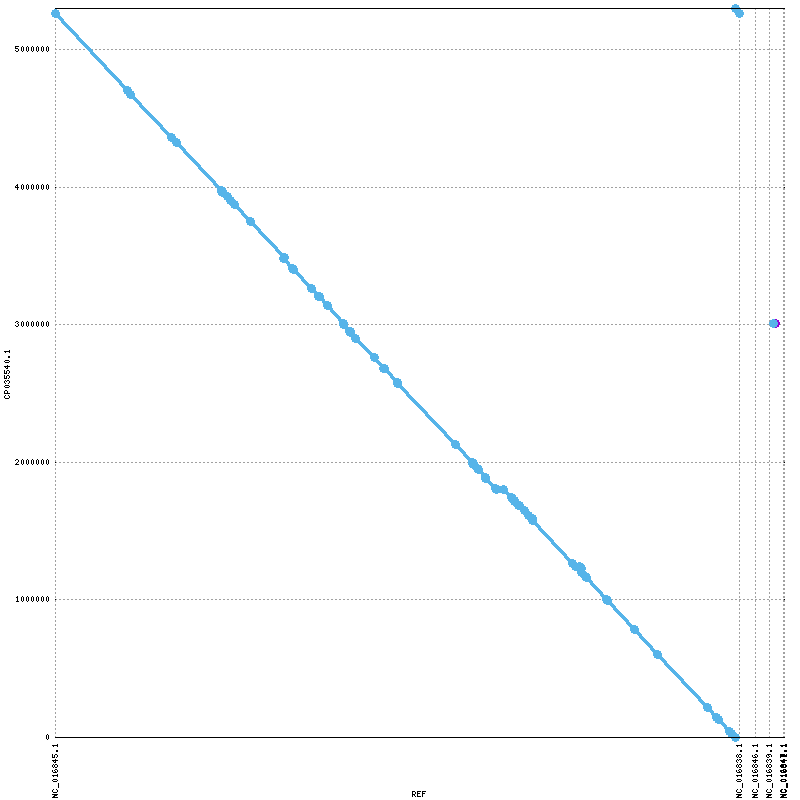